### Imported libraries

In [21]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from tensorflow import keras

### Download training data

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

#### Plot the first sample

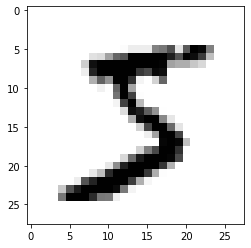

In [25]:
plt.imshow(x_train[0], cmap=plt.cm.binary); plt.show()

### Define incredibly simple 1-layer classifier

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Train the simple model (without validation data). Do we really get 99% accuracy?

In [32]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3627 - accuracy: 0.9002
Epoch 2/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1690 - accuracy: 0.9519
Epoch 3/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1217 - accuracy: 0.9653
Epoch 4/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0939 - accuracy: 0.9727
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0758 - accuracy: 0.9776
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0613 - accuracy: 0.9823
Epoch 7/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0522 - accuracy: 0.9852
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0442 - accuracy: 0.9877
Epoch 9/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0376 - accuracy: 0.9895
Epoch 10/10
60

In [36]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0363 - accuracy: 0.9775


[0.0719457536240574, 0.9775]

In [60]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test),
                      batch_size=128, epochs=20, verbose=0)

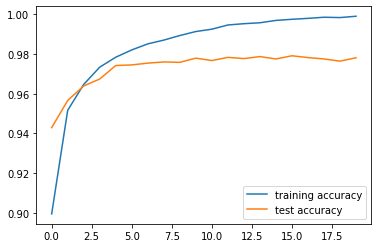

In [61]:
h = history2.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.legend(['training accuracy', 'test accuracy'])

### Add dropout, more layers

In [72]:
x_train[0].shape

(28, 28)

In [75]:
model3 = keras.Sequential([
    keras.layers.Conv2D(64, 4, input_shape=(1, 28, 28), activation='elu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test),
                      batch_size=128, epochs=20, verbose=0)

ValueError: Negative dimension size caused by subtracting 4 from 1 for 'conv2d_6/Conv2D' (op: 'Conv2D') with input shapes: [?,1,28,28], [4,4,28,64].

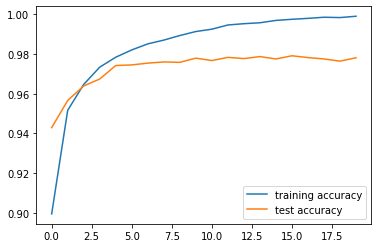

In [67]:
h3 = history3.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.legend(['training accuracy', 'test accuracy'])